In [1]:
from tkinter.tix import NoteBook
from matplotlib.pyplot import title
from matplotlib.pyplot import legend
import plotly.express as px
import matplotlib
import plotly 
import pandas 
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline
import doctest

['2017', '2018', '2019', '2020', '2021', '2022', '2023']


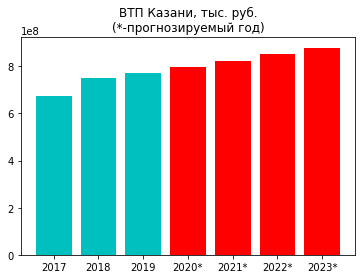

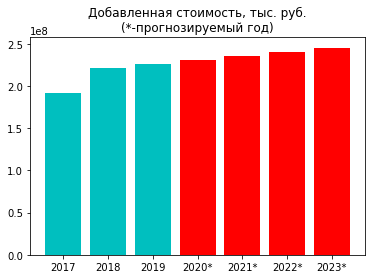

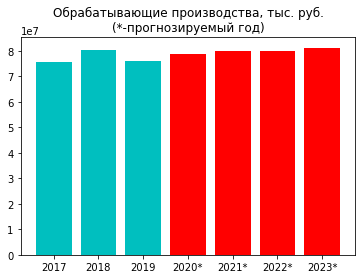

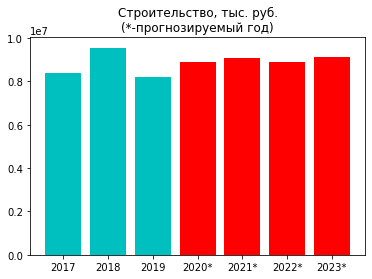

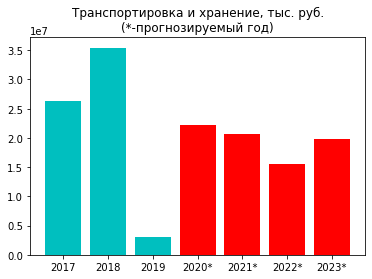

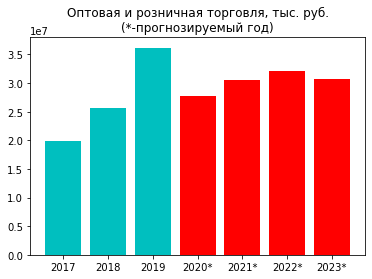

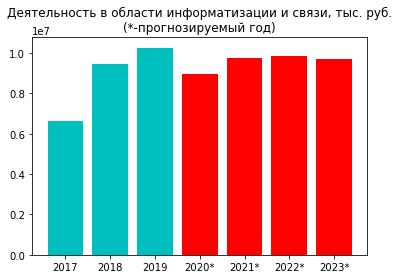

In [4]:
xlsx_name = "C:/Users/pc/.vscode/gitwork/histograms/excel.xlsx"
excel_data=pandas.read_excel('C:/Users/pc/.vscode/gitwork/histograms/excel.xlsx')
def read_xlsx( name_of_file: xlsx_name) -> pandas.DataFrame:
    '''
        Описание: Функция читает содержимое файла с расширением XLSX и преобразует его содержимое в переменую типа pandas.DataFrame
        На вход она получает имя файла с таблицей
        На выход поступает переменная, содержащая в себе таблицу в виде pandas.DataFrame 
        >>> read_xlsx("doctest_excel_correct")
        

    '''
    excel_data=pandas.read_excel(xlsx_name) #прочитали фаил с таблицей 
    data_df=pandas.DataFrame(excel_data)
    return(data_df)


def make_values_axisx(data_df: pandas.DataFrame) -> list:
    years = "" 
    list_for_years=""
    i=0
    standart= "55555"
    data_df.items()
    for col_name, data_df in data_df.items(): #Цикл для помещения в years времени(года в виде 2017, 2018, 2019 и т.д), которое будет анализироваться  
        col_name_in_str=str(col_name)
        if (col_name_in_str!='NoN' and col_name_in_str < standart ):
         col_name_in_str=str(col_name)
         years+=col_name_in_str
    len_years=len(years)
    for j in range(0,7): # Цикл для разделения времени (сделать их читабельными)
        years_for_j=years[i:i+4]
        list_for_years+=(years_for_j + ",")
        i+=4
    split_sheet_year=(list_for_years.split(","))
    split_sheet_year.pop(-1)
    return(split_sheet_year) 


def make_histograms(data_df: pandas.DataFrame) -> None:
    split_sheet_year = make_values_axisx(data_df)
    df_no_nan= data_df[data_df["Unnamed: 0"].notna()] # избавились от NaN в превом столбце
    len_df_no_nan=len(df_no_nan)
    titles_for_histogram = df_no_nan.iloc[0:11,0]
    axis_x = list(split_sheet_year)
    len_axis_x=int(len(axis_x))
    for i in range(0,(len_axis_x)):
        if i > 2:
          axis_x[i]=axis_x[i] + "*"
    for counter in range(0,len_df_no_nan): 
        value_for_check=list(df_no_nan.iloc[int(counter),2:])
        if int(value_for_check[3])> 10:
            y_pos= np.arange(len(split_sheet_year))
            axis_y=list(df_no_nan.iloc[int(counter),2:])
            title=str(df_no_nan.iloc[int(counter),0])
            plt.title(title + "\n(*-прогнозируемый год)")
            fig = plt.bar(axis_x,axis_y,align="center",color=["c"]*3+["r"]*4)
            plt.savefig('images/histogram ' + title + '.pdf')
            plt.show()

data_df = read_xlsx(xlsx_name)
split_sheet_year = make_values_axisx(data_df)
print(split_sheet_year)
make_histograms(data_df)